<a href="https://colab.research.google.com/github/shashwat1007/GRIP-Projects/blob/master/Corona_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
df = pd.read_csv('/content/covid.csv')
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48285 entries, 0 to 48284
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14430 non-null  object 
 1   Country/Region  48285 non-null  object 
 2   Lat             48285 non-null  float64
 3   Long            48285 non-null  float64
 4   Date            48285 non-null  object 
 5   Confirmed       48285 non-null  int64  
 6   Deaths          48285 non-null  int64  
 7   Recovered       48285 non-null  int64  
 8   Active          48285 non-null  int64  
 9   WHO Region      48285 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df = pd.read_csv(r'/content/covid.csv',parse_dates=['Date'])
#df.info()

In [ ]:
df.rename(columns={"Country/Region":"country",'Province/State':'state'},inplace=True)
#df.head()

In [ ]:
df['active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
#df.head(50)

In [ ]:
top = df[df['Date'] == df['Date'].max()]
world = top.groupby('country')['Confirmed','active','Deaths'].sum()
#world.head()

world = top.groupby('country')['Confirmed','active','Deaths','Recovered'].sum().reset_index()
world.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,country,Confirmed,active,Deaths,Recovered
182,West Bank and Gaza,10093,7303,70,2720
183,Western Sahara,10,1,1,8
184,Yemen,1674,426,469,779
185,Zambia,3856,2043,136,1677
186,Zimbabwe,2296,1750,32,514


In [ ]:
#CONFIRMED CASES
figure = px.choropleth(world,locations="country",locationmode='country names' 
                       ,color="Confirmed",hover_name="country",range_color=[1,1000],
                      color_continuous_scale="purples",title="Country with CONFIRMED Cases")
figure.show()

In [ ]:
#ACTIVE CASES
figure = px.choropleth(world,locations="country",locationmode='country names' 
                       ,color="active",hover_name="country",range_color=[1,1000],
                      color_continuous_scale="blues",title="Country with ACTIVE Cases")
figure.show()

In [ ]:
#DEATH CASES
figure = px.choropleth(world,locations="country",locationmode='country names' 
                       ,color="Deaths",hover_name="country",range_color=[1,1000],
                      color_continuous_scale="Peach",title="Country with DEATH Cases")
figure.show()

In [ ]:
#RECOVERED CASES
figure = px.choropleth(world,locations="country",locationmode='country names' 
                       ,color="Recovered",hover_name="country",range_color=[1,1000],
                      color_continuous_scale="mint",title="Country with RECOVERED Cases")
figure.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

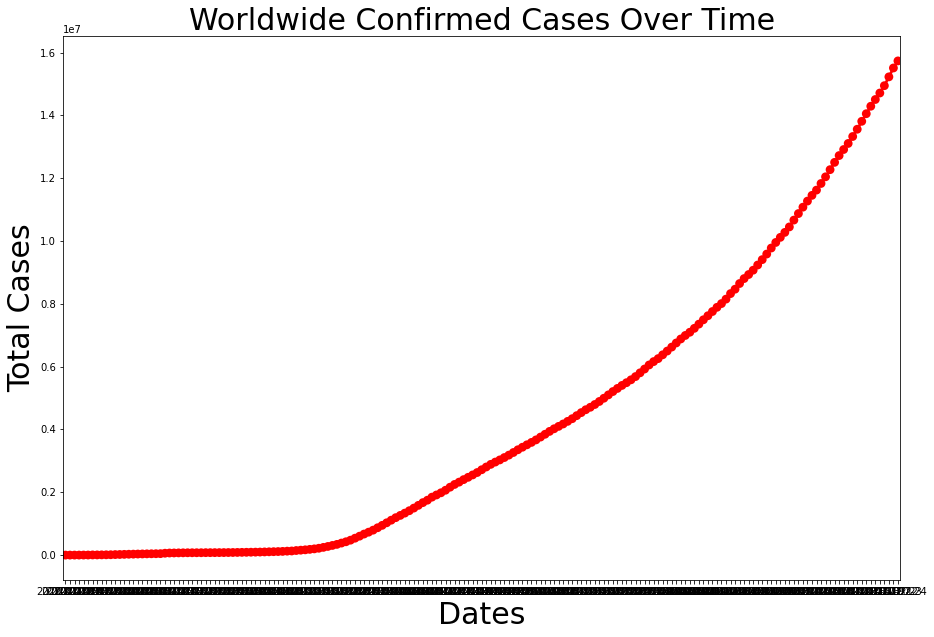

In [ ]:
#CONFIRMED CASES
plt.figure(figsize=(15,10))
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide Confirmed Cases Over Time",fontsize=30)
total_cases = df.groupby('Date')['Date','Confirmed'].sum().reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
a = sns.pointplot(x = total_cases.Date.dt.date,y=total_cases.Confirmed,color='r')
a.set(xlabel="Dates",ylabel="Total Cases")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

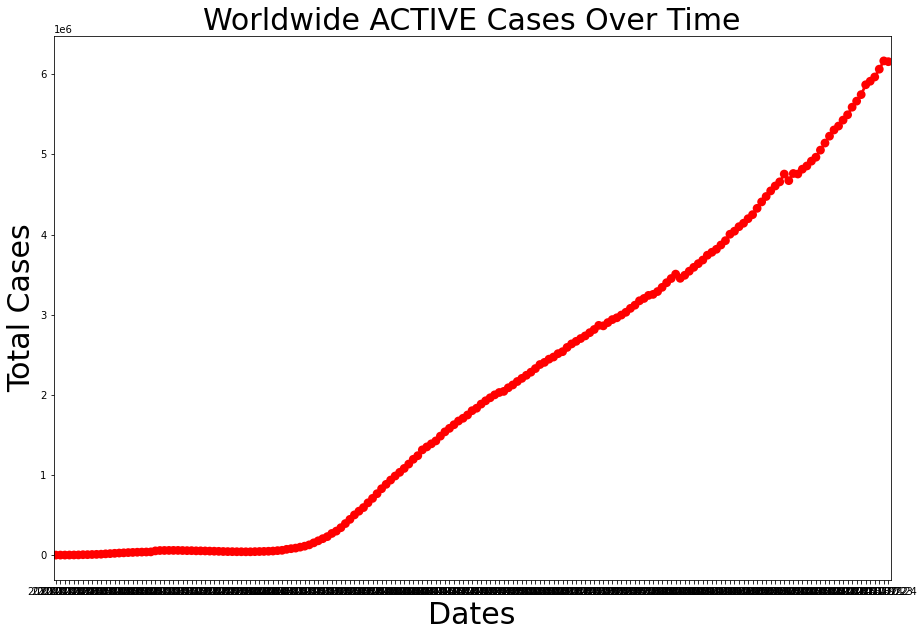

In [ ]:
#ACTIVE CASES
plt.figure(figsize=(15,10))
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide ACTIVE Cases Over Time",fontsize=30)
total_cases = df.groupby('Date')['Date','active'].sum().reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
a = sns.pointplot(x = total_cases.Date.dt.date,y=total_cases.active,color='r')
a.set(xlabel="Dates",ylabel="Total Cases")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

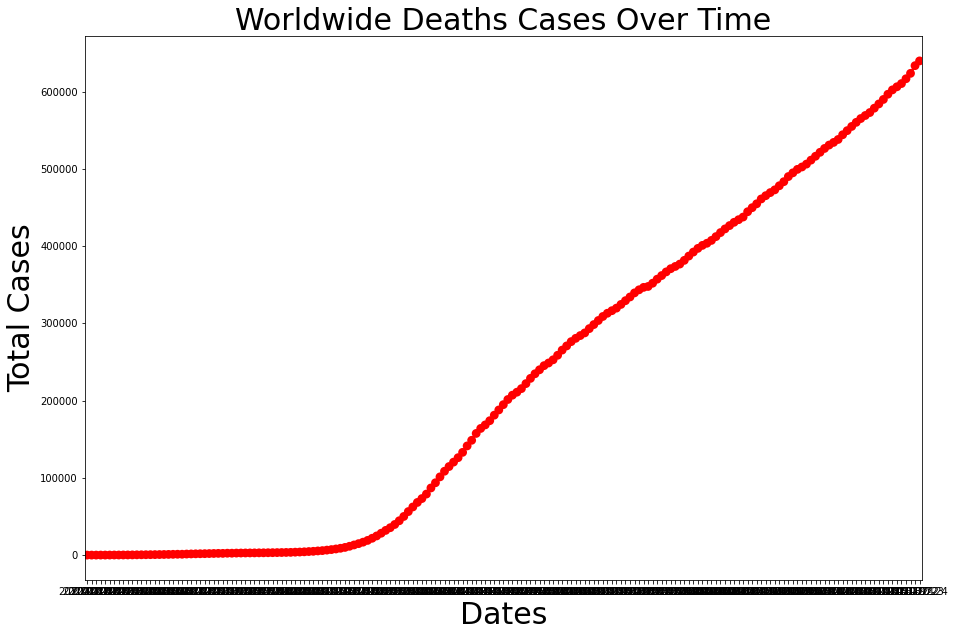

In [ ]:
#DEATH CASES
plt.figure(figsize=(15,10))
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide Deaths Cases Over Time",fontsize=30)
total_cases = df.groupby('Date')['Date','Deaths'].sum().reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
a = sns.pointplot(x = total_cases.Date.dt.date,y=total_cases.Deaths,color='r')
a.set(xlabel="Dates",ylabel="Total Cases")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

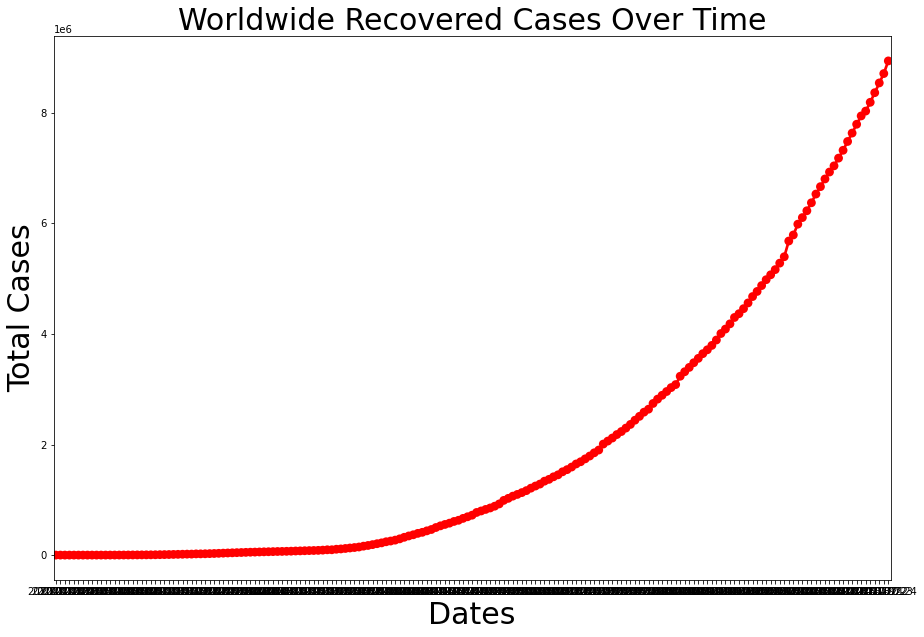

In [ ]:
#RECOVERED CASES
plt.figure(figsize=(15,10))
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide Recovered Cases Over Time",fontsize=30)
total_cases = df.groupby('Date')['Date','Recovered'].sum().reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
a = sns.pointplot(x = total_cases.Date.dt.date,y=total_cases.Recovered,color='r')
a.set(xlabel="Dates",ylabel="Total Cases")

In [ ]:
#CONFIRMED
top_confirm = top.groupby(by='country')['Confirmed'].sum()
top_confirm.head()

country
Afghanistan    35981
Albania         4570
Algeria        26159
Andorra          897
Angola           880
Name: Confirmed, dtype: int64

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

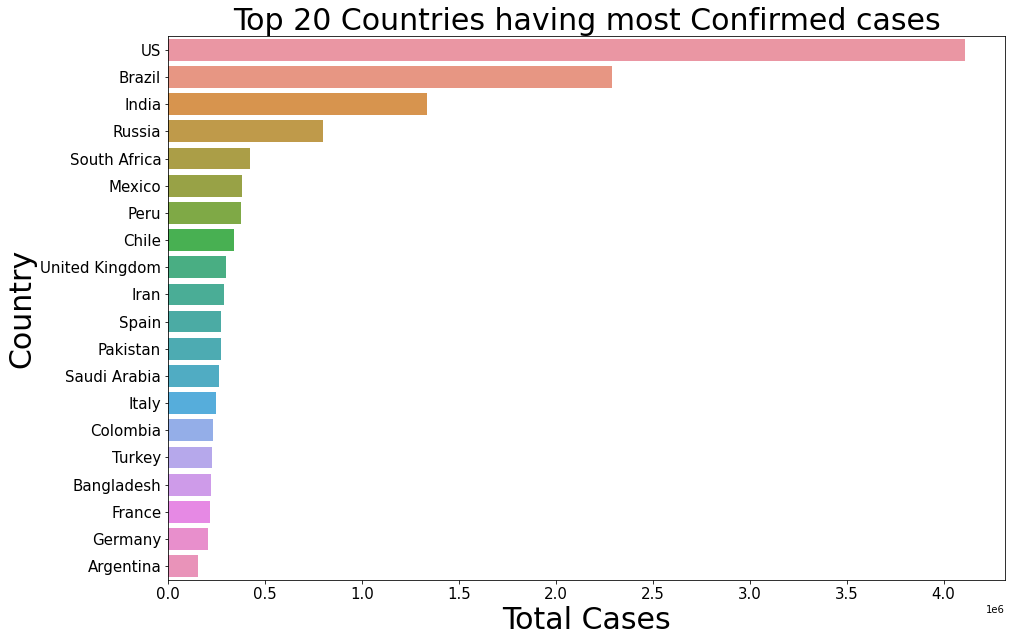

In [ ]:
top_confirm= top.groupby(by='country')['Confirmed'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Confirmed cases",fontsize=30)
ax = sns.barplot(x=top_confirm.Confirmed,y=top_confirm.country)
ax.set(xlabel="Total Cases",ylabel="Country")

In [ ]:
#ACTIVE
top_actives = top.groupby(by='country')['active'].sum()
top_actives.head()

country
Afghanistan    10154
Albania         1834
Algeria         7654
Andorra           42
Angola           604
Name: active, dtype: int64

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

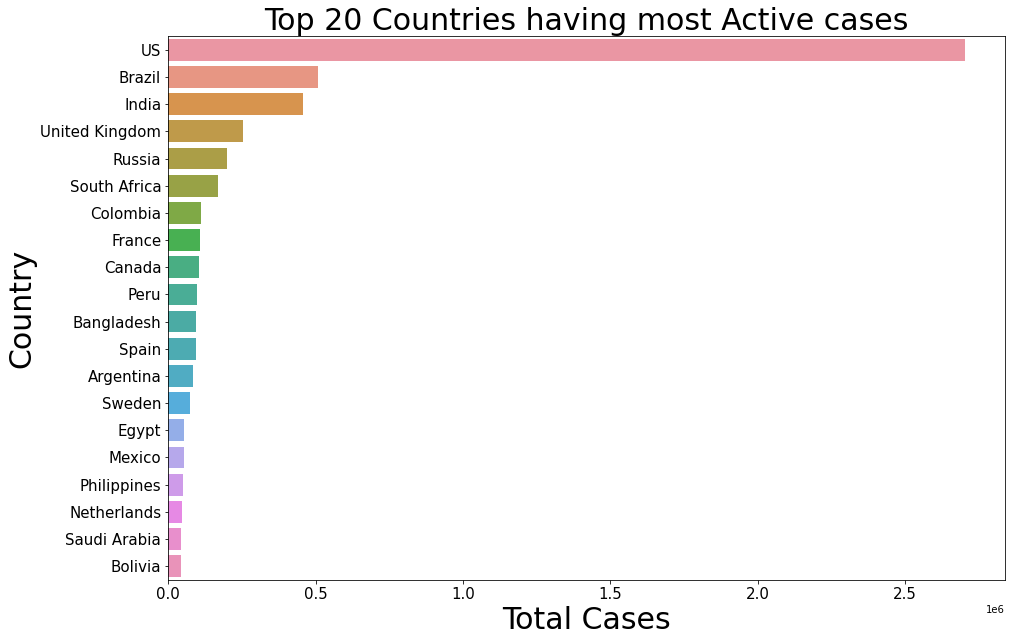

In [ ]:
top_actives= top.groupby(by='country')['active'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Active cases",fontsize=30)
ax = sns.barplot(x=top_actives.active,y=top_actives.country)
ax.set(xlabel="Total Cases",ylabel="Country")

In [ ]:
#DEATHS
top_death= top.groupby(by='country')['Deaths'].sum()
top_death.head()

country
Afghanistan    1225
Albania         128
Algeria        1136
Andorra          52
Angola           35
Name: Deaths, dtype: int64

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

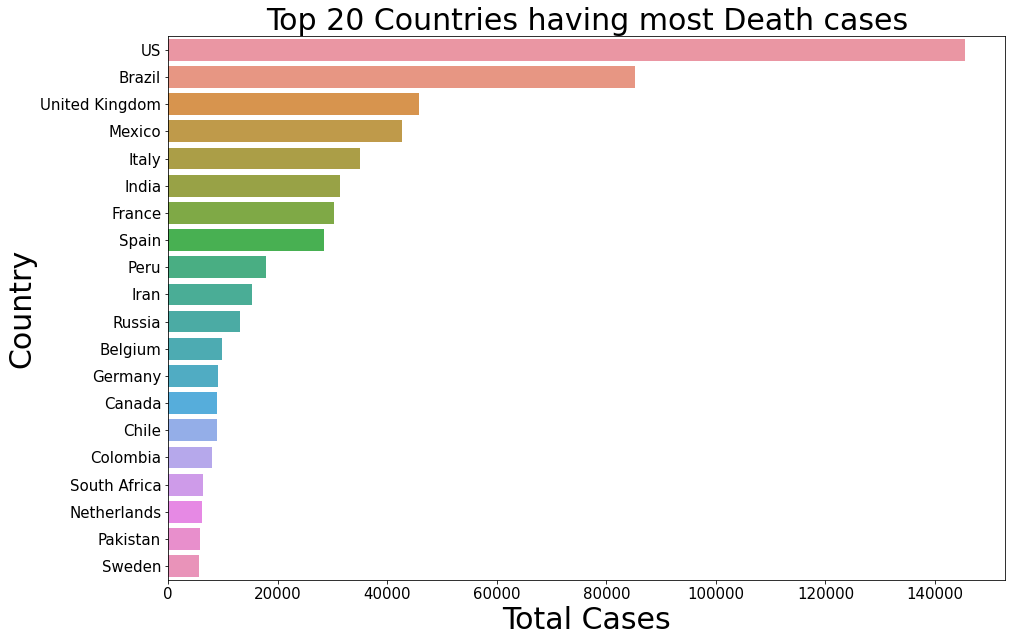

In [ ]:
top_death= top.groupby(by='country')['Deaths'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Death cases",fontsize=30)
ax = sns.barplot(x=top_death.Deaths,y=top_death.country)
ax.set(xlabel="Total Cases",ylabel="Country")

In [ ]:
#RECOVERED
top_recover= top.groupby(by='country')['Recovered'].sum()
top_recover.head()

country
Afghanistan    24602
Albania         2608
Algeria        17369
Andorra          803
Angola           241
Name: Recovered, dtype: int64

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

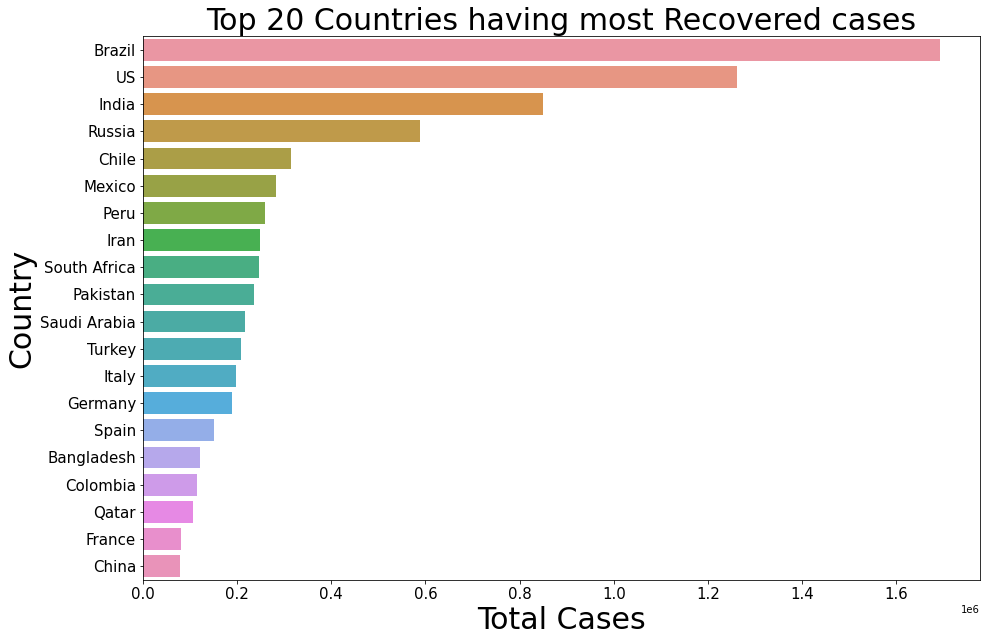

In [ ]:
top_recover= top.groupby(by='country')['Recovered'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Recovered cases",fontsize=30)
ax = sns.barplot(x=top_recover.Recovered,y=top_recover.country)
ax.set(xlabel="Total Cases",ylabel="Country")

In [ ]:
#CHINA US ITALY INDIA

china = df[df.country == 'China']
#china.head()
china = china.groupby(by='Date')['Recovered','active','Confirmed','Deaths'].sum().reset_index()
#china.head(10)

us = df[df.country == 'US']
us = us.groupby(by='Date')['Recovered','active','Confirmed','Deaths'].sum().reset_index()
#us.head(10)

italy = df[df.country == 'Italy']
italy = italy.groupby(by='Date')['Recovered','active','Confirmed','Deaths'].sum().reset_index()
#italy.head(10)

india = df[df.country == 'India']
india = india.groupby(by='Date')['Recovered','active','Confirmed','Deaths'].sum().reset_index()
#india.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
china = df[df.country == 'China']
china = china.groupby(by='Date')['Recovered','active','Confirmed','Deaths'].sum().reset_index()
china.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,active,Confirmed,Deaths
0,2020-01-22,28,503,548,17
1,2020-01-23,30,595,643,18
2,2020-01-24,36,858,920,26
3,2020-01-25,39,1325,1406,42
4,2020-01-26,49,1970,2075,56
5,2020-01-27,58,2737,2877,82
6,2020-01-28,101,5277,5509,131
7,2020-01-29,119,5835,6087,133
8,2020-01-30,133,7837,8141,171
9,2020-01-31,211,9378,9802,213


In [ ]:
#dataframe for Italy
italy = df[df.country == 'Italy']
italy = italy.groupby(by='Date')['Recovered','active','Confirmed','Deaths'].sum().reset_index()
italy.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,active,Confirmed,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
5,2020-01-27,0,0,0,0
6,2020-01-28,0,0,0,0
7,2020-01-29,0,0,0,0
8,2020-01-30,0,0,0,0
9,2020-01-31,0,2,2,0


In [ ]:
#dataframe for US
us = df[df.country == 'US']
us = us.groupby(by='Date')['Recovered','active','Confirmed','Deaths'].sum().reset_index()
us.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,active,Confirmed,Deaths
0,2020-01-22,0,1,1,0
1,2020-01-23,0,1,1,0
2,2020-01-24,0,2,2,0
3,2020-01-25,0,2,2,0
4,2020-01-26,0,5,5,0
5,2020-01-27,0,5,5,0
6,2020-01-28,0,5,5,0
7,2020-01-29,0,5,5,0
8,2020-01-30,0,5,5,0
9,2020-01-31,0,7,7,0


In [ ]:
india = df[df.country == 'India']
india = india.groupby(by='Date')['Recovered','active','Confirmed','Deaths'].sum().reset_index()
india.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,active,Confirmed,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
5,2020-01-27,0,0,0,0
6,2020-01-28,0,0,0,0
7,2020-01-29,0,0,0,0
8,2020-01-30,0,1,1,0
9,2020-01-31,0,1,1,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning

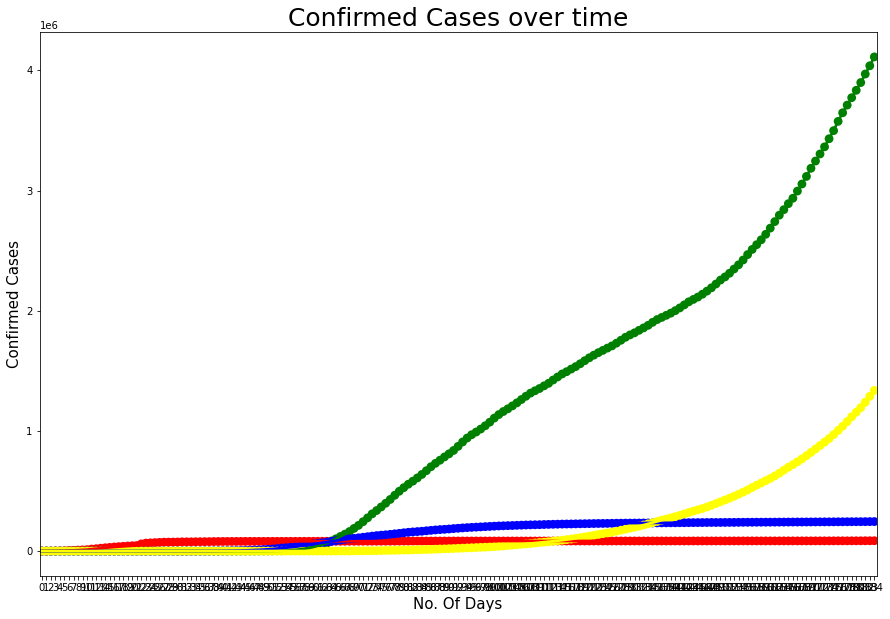

In [ ]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.Confirmed,color="Red")
sns.pointplot(us.index,us.Confirmed,color="Green")
sns.pointplot(italy.index,italy.Confirmed,color="Blue")
sns.pointplot(india.index,india.Confirmed,color="Yellow")
plt.title("Confirmed Cases over time", fontsize=25)
plt.ylabel("Confirmed Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning

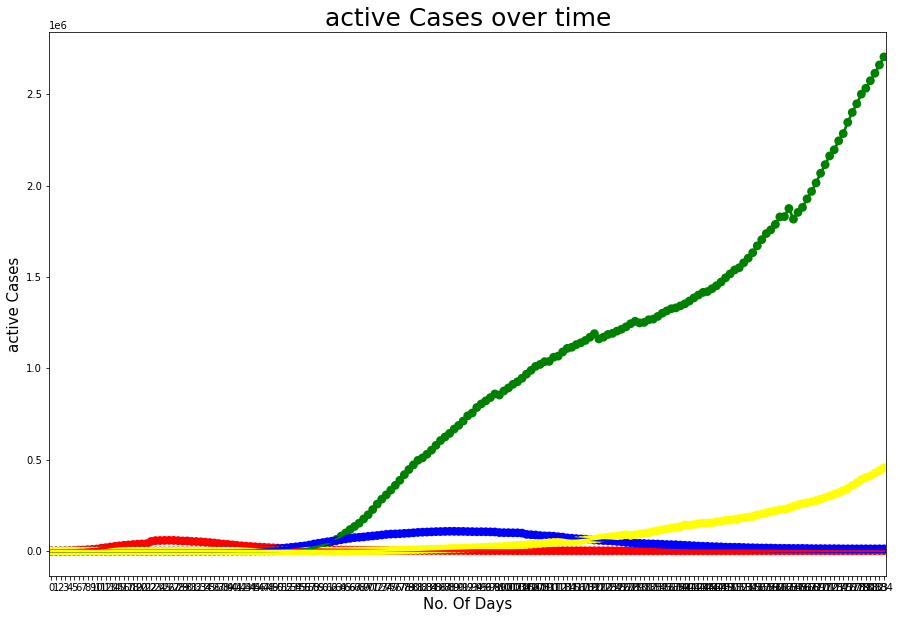

In [ ]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.active,color="Red")
sns.pointplot(us.index,us.active,color="Green")
sns.pointplot(italy.index,italy.active,color="Blue")
sns.pointplot(india.index,india.active,color="Yellow")
plt.title("active Cases over time", fontsize=25)
plt.ylabel("active Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning

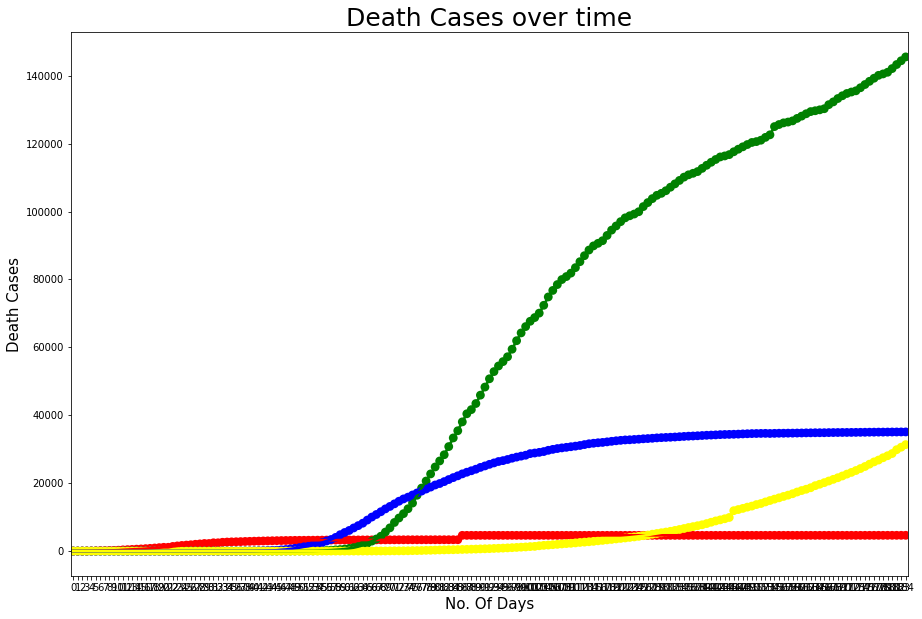

In [ ]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.Deaths,color="Red")
sns.pointplot(us.index,us.Deaths,color="Green")
sns.pointplot(italy.index,italy.Deaths,color="Blue")
sns.pointplot(india.index,india.Deaths,color="Yellow")
plt.title("Death Cases over time", fontsize=25)
plt.ylabel("Death Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning

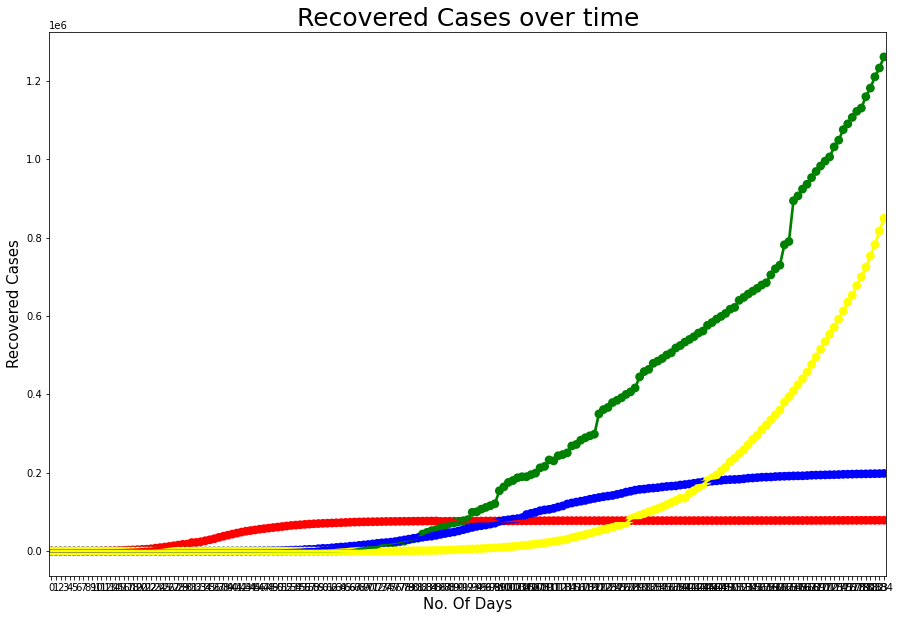

In [ ]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.Recovered,color="Red")
sns.pointplot(us.index,us.Recovered,color="Green")
sns.pointplot(italy.index,italy.Recovered,color="Blue")
sns.pointplot(india.index,india.Recovered,color="Yellow")
plt.title("Recovered Cases over time", fontsize=25)
plt.ylabel("Recovered Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
active = df.groupby('Date').sum()['active'].reset_index()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


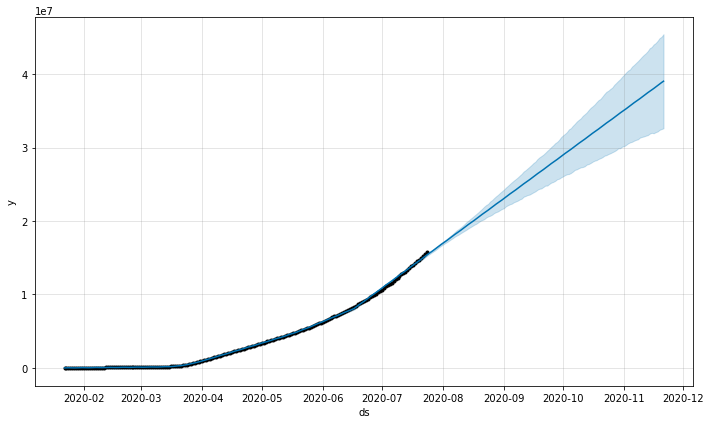

In [ ]:
#renaming columns 
# prophet need two columns for prediction (ds-date,y-that we want to predict)
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])  ## convert to datetime
m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(confirmed)                  ## applyying data to model
future = m.make_future_dataframe(periods=120)  ## making furure prediction for next 7 days
future.tail()                 # print last 5 days

forecast = m.predict(future)

forecast.head()  ## data of prediction
metric_df=forecast.set_index('ds')[['yhat']].join(confirmed.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction

metric_df.dropna(inplace=True)
#print(metric_df)


confirmed_forecast_plot = m.plot(forecast)  # ploting predicted value of confirmed cases
# black dot - actual values
# blue line = predicted values

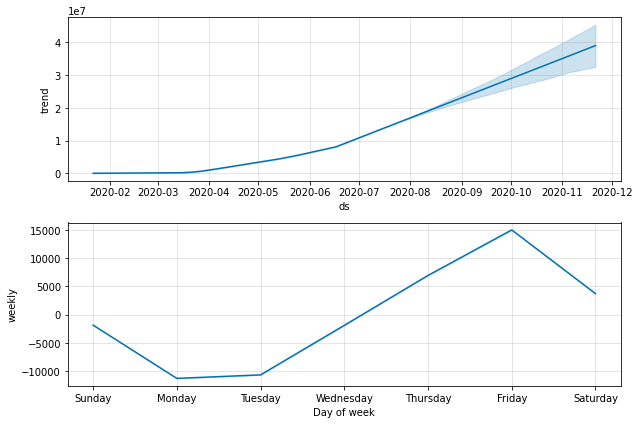

In [ ]:
confirmed_forecast_plot = m.plot_components(forecast)

In [ ]:
#R-Score
r2_score(metric_df.y, metric_df.yhat)

0.9997208057936732

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


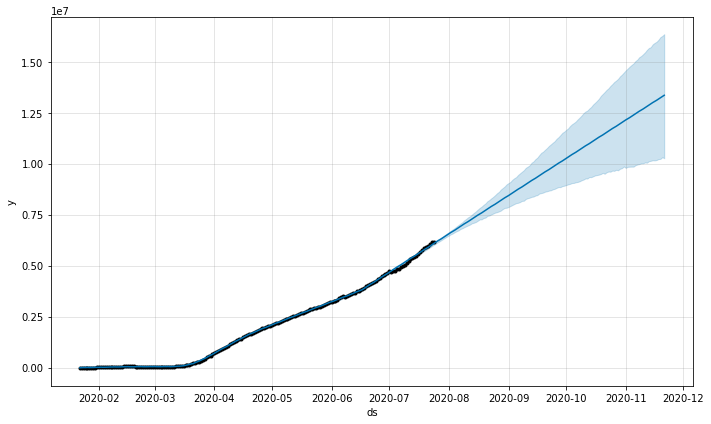

In [ ]:
#renaming columns 
# prophet need two columns for prediction (ds-date,y-that we want to predict)
active.columns = ['ds','y']
active['ds'] = pd.to_datetime(active['ds'])  ## convert to datetime
m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(active)                  ## applyying data to model
future = m.make_future_dataframe(periods=120)  ## making furure prediction for next 7 days
#future.tail()                 # print last 5 days

forecast = m.predict(future)

forecast.head()  ## data of prediction
metric_df=forecast.set_index('ds')[['yhat']].join(active.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction

metric_df.dropna(inplace=True)
#print(metric_df)

active_forecast_plot = m.plot(forecast)  # ploting predicted value of confirmed cases
# black dot - actual values
# blue line = predicted values

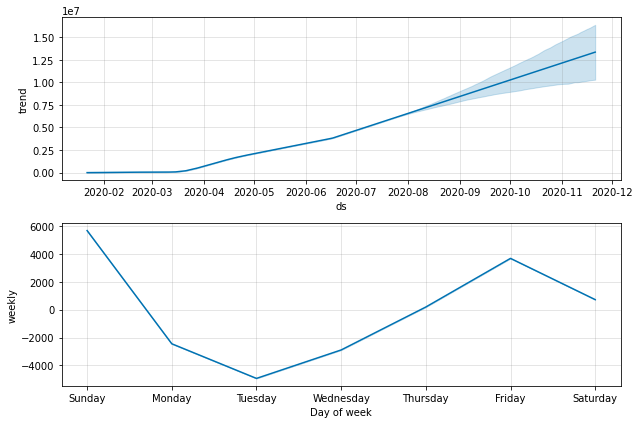

In [ ]:
active_forecast_plot = m.plot_components(forecast)

In [ ]:
#R-Score
r2_score(metric_df.y, metric_df.yhat)

0.999675486183655

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


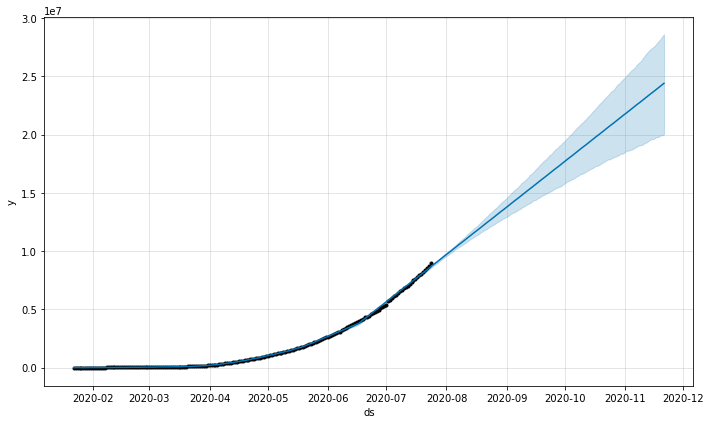

In [ ]:
#renaming columns 
# prophet need two columns for prediction (ds-date,y-that we want to predict)
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])  ## convert to datetime
m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(recovered)                  ## applyying data to model
future = m.make_future_dataframe(periods=120)  ## making furure prediction for next 7 days
#future.tail()                 # print last 5 days

forecast = m.predict(future)

forecast.head()  ## data of prediction
metric_df=forecast.set_index('ds')[['yhat']].join(recovered.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction

metric_df.dropna(inplace=True)
#print(metric_df)

recovered_forecast_plot = m.plot(forecast)  # ploting predicted value of confirmed cases
# black dot - actual values
# blue line = predicted values

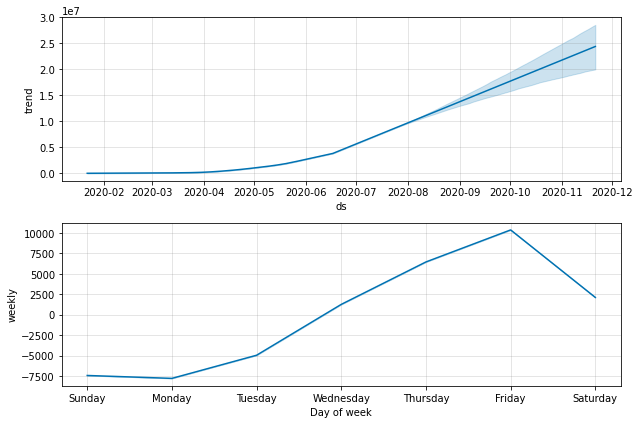

In [ ]:
recovered_forecast_plot = m.plot_components(forecast)

In [ ]:
#R-Score
r2_score(metric_df.y, metric_df.yhat)

0.9994471825288979

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


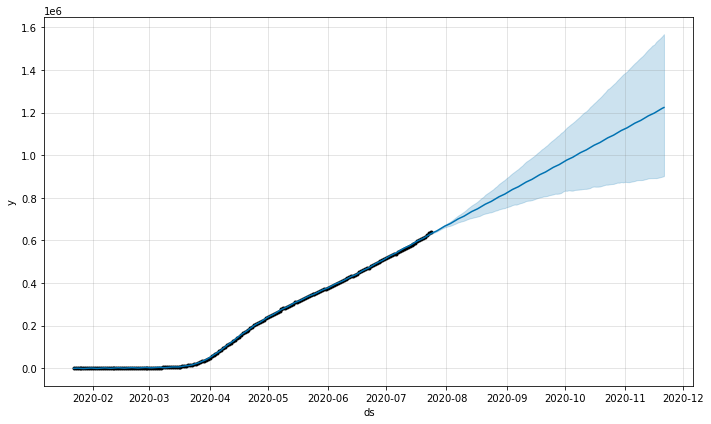

In [ ]:
#renaming columns 
# prophet need two columns for prediction (ds-date,y-that we want to predict)
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])  ## convert to datetime
m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(deaths)                  ## applyying data to model
future = m.make_future_dataframe(periods=120)  ## making furure prediction for next 7 days
#future.tail()                 # print last 5 days

forecast = m.predict(future)

forecast.head()  ## data of prediction
metric_df=forecast.set_index('ds')[['yhat']].join(deaths.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction

metric_df.dropna(inplace=True)
#print(metric_df)

deaths_forecast_plot = m.plot(forecast)  # ploting predicted value of confirmed cases
# black dot - actual values
# blue line = predicted values

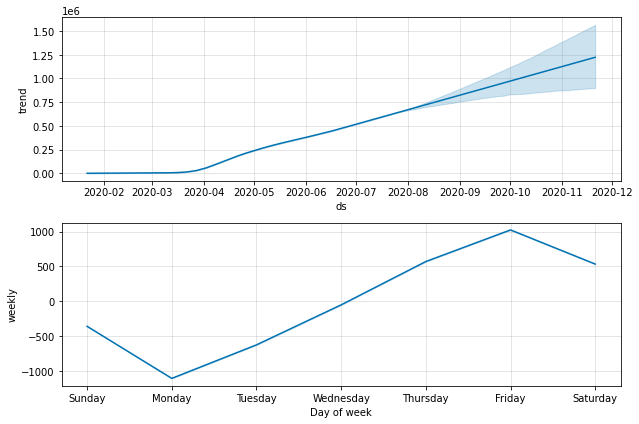

In [ ]:
deaths_forecast_plot = m.plot_components(forecast)

In [ ]:
#R-Score
r2_score(metric_df.y, metric_df.yhat)

0.9999669561341361

In [ ]:
df_india = df.query('country=="India"')
#df_india.head()
df_india = df.query('country=="India"').groupby('Date')[['Confirmed','Deaths','Recovered','active']].sum().reset_index()
india_confirmed,india_deaths,india_recovered,india_active = df_india[['Date','Confirmed']],df_india[['Date','Deaths']],df_india[['Date','Recovered']],df_india[['Date','active']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


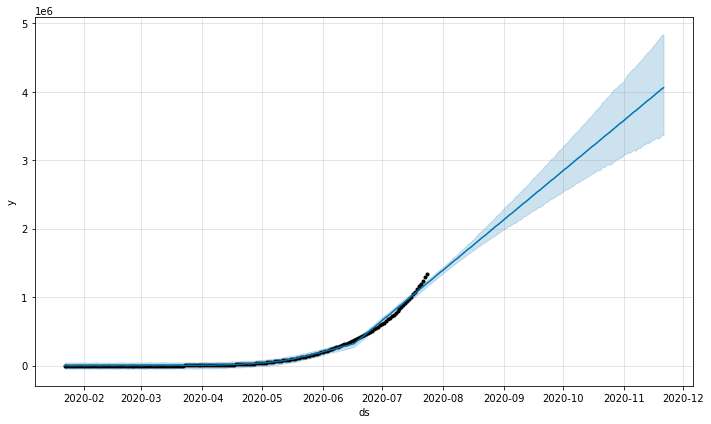

In [ ]:
india_confirmed.columns = ['ds','y']
india_confirmed['ds'] = pd.to_datetime(india_confirmed['ds']) 
#india_confirmed.head()

m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(india_confirmed)                  ## applyying data to model
future = m.make_future_dataframe(periods=120)  ## making furure prediction for next 7 days
future.tail()                 # print last 5 days

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

metric_df=forecast.set_index('ds')[['yhat']].join(india_confirmed.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction
metric_df.dropna(inplace=True)
#print(metric_df)

india_confirmed_forecast_plot = m.plot(forecast)  # ploting predicted value of confirmed cases

In [ ]:
#R-Score
r2_score(metric_df.y, metric_df.yhat)

0.9948942923875993

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


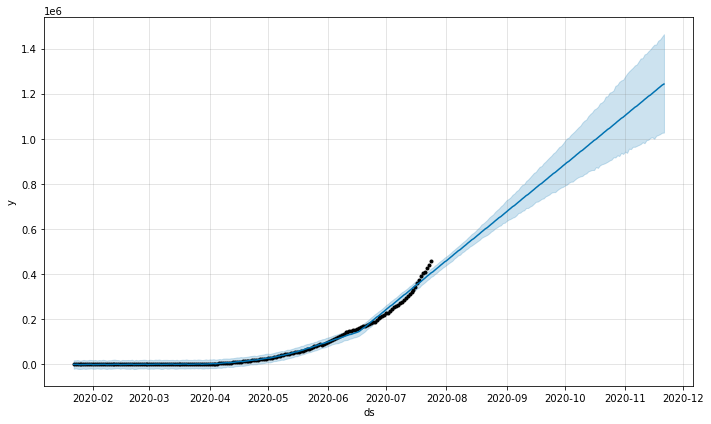

In [ ]:
india_active.columns = ['ds','y']
india_active['ds'] = pd.to_datetime(india_active['ds']) 

#india_active.head()

m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(india_active)                  ## applyying data to model
future = m.make_future_dataframe(periods=120)  ## making furure prediction for next 7 days
future.tail()                 # print last 5 days

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
metric_df=forecast.set_index('ds')[['yhat']].join(india_active.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction
metric_df.dropna(inplace=True)
#print(metric_df)

india_active_forecast_plot = m.plot(forecast)  # ploting predicted value of active cases

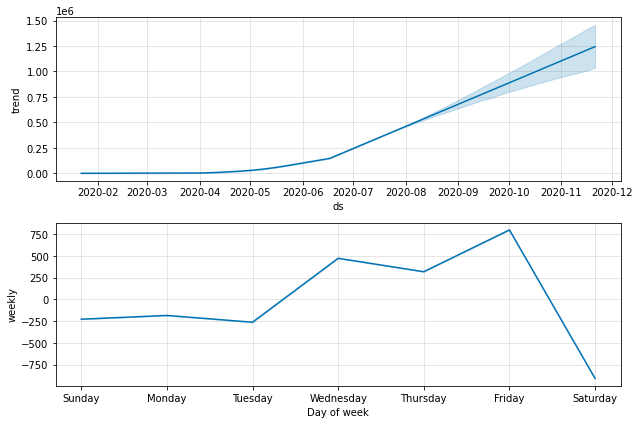

In [ ]:
india_active_forecast_plot = m.plot_components(forecast)

In [ ]:
#R-Score
r2_score(metric_df.y, metric_df.yhat)

0.9926415310509616

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


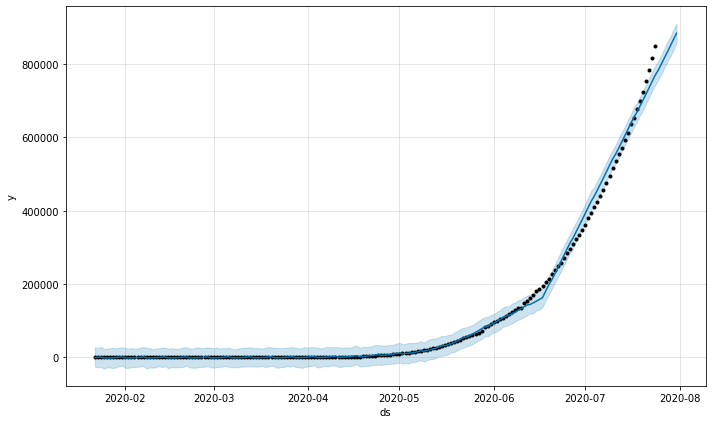

In [ ]:
india_recovered.columns = ['ds','y']
india_recovered['ds'] = pd.to_datetime(india_recovered['ds']) 
#india_recovered.head()

m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(india_recovered)                  ## applyying data to model
future = m.make_future_dataframe(periods=7)  ## making furure prediction for next 7 days
future.tail()                 # print last 5 days

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

metric_df=forecast.set_index('ds')[['yhat']].join(india_recovered.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction
metric_df.dropna(inplace=True)
#print(metric_df)

india_recover_forecast_plot = m.plot(forecast)  # ploting predicted value of recover cases

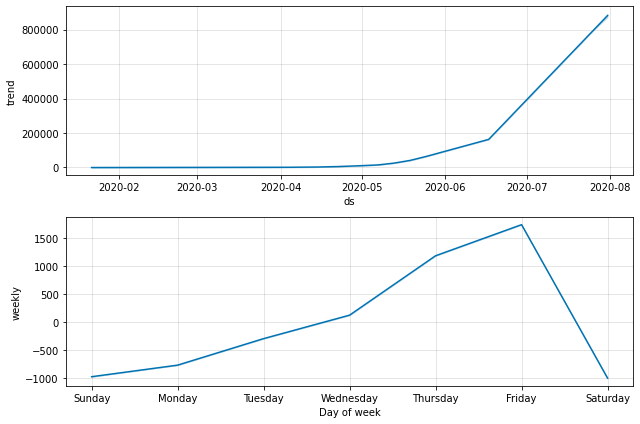

In [ ]:
india_recover_forecast_plot = m.plot_components(forecast)

In [ ]:
#R-Score
r2_score(metric_df.y, metric_df.yhat)

0.9956056805553996

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


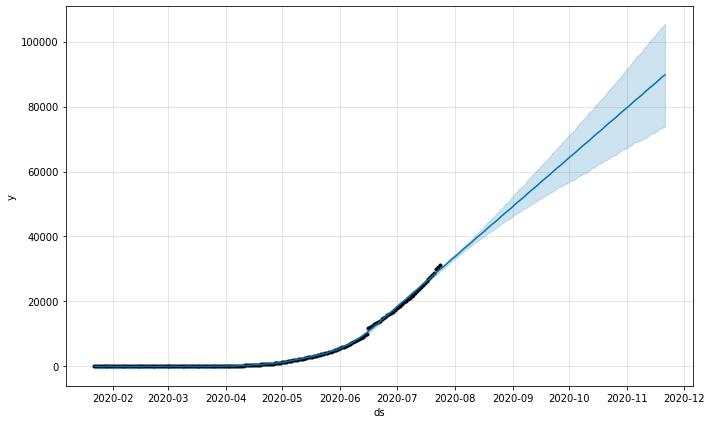

In [ ]:
india_deaths.columns = ['ds','y']
india_deaths['ds'] = pd.to_datetime(india_deaths['ds']) 
#india_deaths.head()

m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(india_deaths)                  ## applyying data to model
future = m.make_future_dataframe(periods=120) 
future.tail()                 

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

metric_df=forecast.set_index('ds')[['yhat']].join(india_deaths.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction
metric_df.dropna(inplace=True)
#print(metric_df)

india_deaths_forecast_plot = m.plot(forecast)  # ploting predicted value of death cases

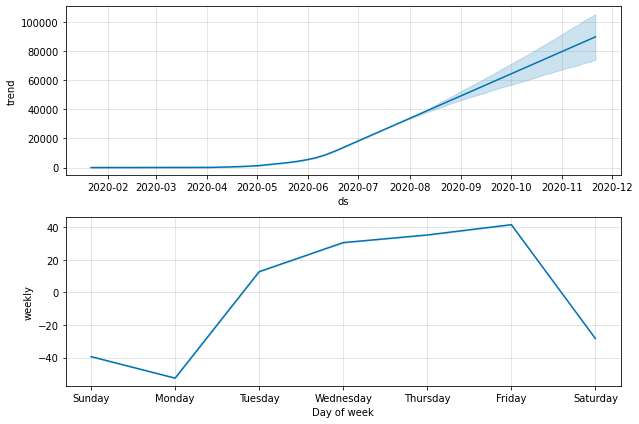

In [ ]:
india_deaths_forecast_plot = m.plot_components(forecast)

In [ ]:
#R-Score
r2_score(metric_df.y, metric_df.yhat)

0.9988231951544508

In [ ]:
from fbprophet import Prophet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go


df = pd.read_csv(r'/content/covid.csv',parse_dates=['Date'])
#renaming column names and determining active cases and appending it to data frame
df.rename(columns={"Country/Region":"country",'Province/State':'state'},inplace=True)
df['active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
#renaming of columns for ease
confirmed.columns = ['ds','y']
deaths.columns =['ds','y']
recovered.columns =['ds','y']

In [ ]:
#convert to datetime
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
deaths['ds'] = pd.to_datetime(deaths['ds'])  
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [ ]:
#FOR CONFIRMED CASES 

#making a model of prophet with accuracy 95$
m = Prophet(interval_width=0.95) 
#applyying data to model
m.fit(confirmed)  
#making furure prediction for next 10 days               
future = m.make_future_dataframe(periods=120) 
# print last 5 days
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
300,2020-11-17
301,2020-11-18
302,2020-11-19
303,2020-11-20
304,2020-11-21


In [ ]:
#forcast the predicted values
forecast = m.predict(future)
#data of prediction
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
300,2020-11-17,3.824891e+07,3.230811e+07,4.416396e+07,3.229802e+07,4.417695e+07,-10667.772326,-10667.772326,-10667.772326,-10667.772326,-10667.772326,-10667.772326,0.0,0.0,0.0,3.823824e+07
301,2020-11-18,3.844606e+07,3.243932e+07,4.451904e+07,3.239816e+07,4.448843e+07,-1891.818573,-1891.818573,-1891.818573,-1891.818573,-1891.818573,-1891.818573,0.0,0.0,0.0,3.844417e+07
302,2020-11-19,3.864321e+07,3.250305e+07,4.472410e+07,3.249856e+07,4.476186e+07,6952.446813,6952.446813,6952.446813,6952.446813,6952.446813,6952.446813,0.0,0.0,0.0,3.865017e+07
303,2020-11-20,3.884037e+07,3.263320e+07,4.507591e+07,3.262505e+07,4.503529e+07,15015.855177,15015.855177,15015.855177,15015.855177,15015.855177,15015.855177,0.0,0.0,0.0,3.885538e+07
304,2020-11-21,3.903752e+07,3.281060e+07,4.541471e+07,3.276790e+07,4.530872e+07,3731.106658,3731.106658,3731.106658,3731.106658,3731.106658,3731.106658,0.0,0.0,0.0,3.904125e+07


In [ ]:
# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction

#forcast 5 days predictions
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
300,2020-11-17,3.823824e+07,3.230811e+07,4.416396e+07
301,2020-11-18,3.844417e+07,3.243932e+07,4.451904e+07
302,2020-11-19,3.865017e+07,3.250305e+07,4.472410e+07
303,2020-11-20,3.885538e+07,3.263320e+07,4.507591e+07
304,2020-11-21,3.904125e+07,3.281060e+07,4.541471e+07


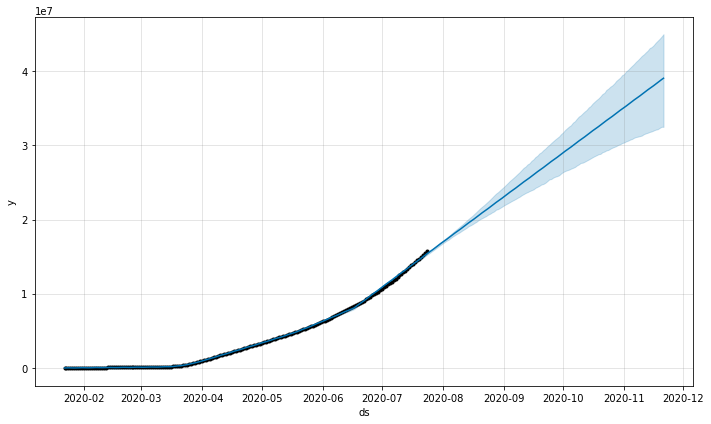

In [ ]:
# ploting predicted value of confirmed cases
confirmed_forecast_plot = m.plot(forecast)  
# black dot = actual values
# blue line = predicted values